In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### How to get dataset directly.....if in github...go to data then click 'raw' then use the 'link of the raw ' to the dataframe you want.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv')
df.head(2)

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.110,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.101,-5.640,0.3600,129.993,3


### Check if any missing values.

In [3]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [4]:
df['artist_top_genre'].unique()

array(['alternative r&b', 'afropop', 'indie r&b', 'nigerian pop',
       'afro r&b', 'afro dancehall', 'Missing', 'azonto', 'soft rock',
       'hiplife', 'erotica', 'nigerian hip hop', 'highlife',
       'azontobeats', 'south african house', 'bongo flava', 'afroswing',
       'gqom', 'christian afrobeat'], dtype=object)

### Getting the number of genres in the data.

In [5]:
df.artist_top_genre.unique()
print(f' There are {df.artist_top_genre.nunique()} genre in our data.')

 There are 19 genre in our data.


In [6]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [8]:
df['artist_top_genre'].nunique()
print(f" There are {df['artist_top_genre'].nunique()} genres in the data set.")

 There are 19 genres in the data set.


### Filtering the data as there was a genre named 'Missing'.

 All genres displayed in the chart.


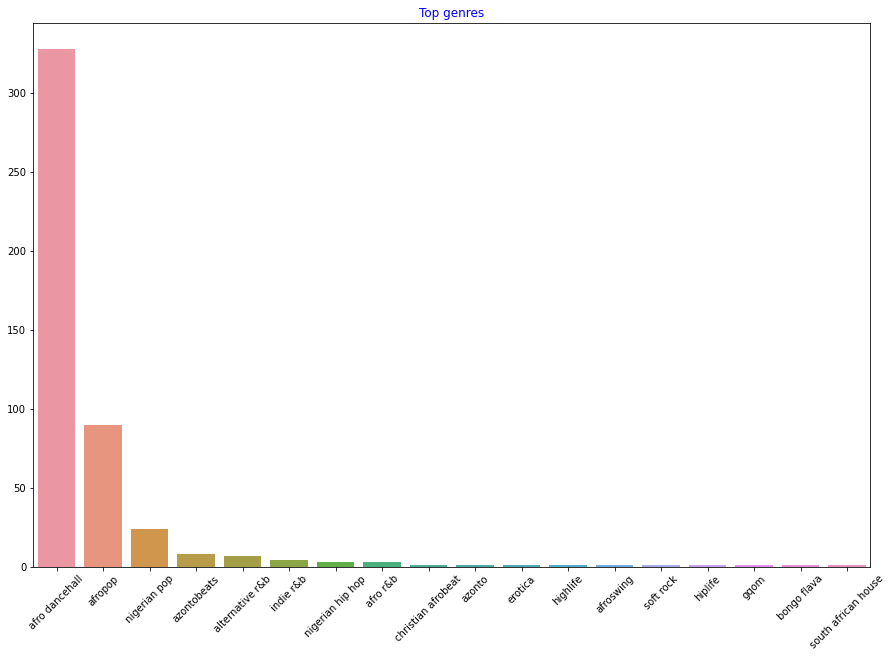

In [10]:
df = df[df['artist_top_genre'] != 'Missing']
all_genre = df['artist_top_genre'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(x=all_genre.index,y=all_genre.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')
print(f' All genres displayed in the chart.')

### The top 5 genres in the given data set.

 The top 5 genres are displayed


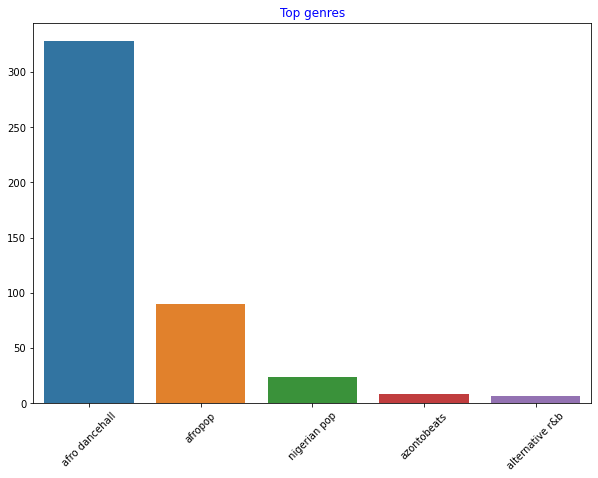

In [13]:
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')
print(f' The top 5 genres are displayed')

#### From the chart of the top 5 genres, we can see a hugh significance between "Afro dancehall" and "Afro pop".

### The bottom of the genres.


 The bottom genres are displayed


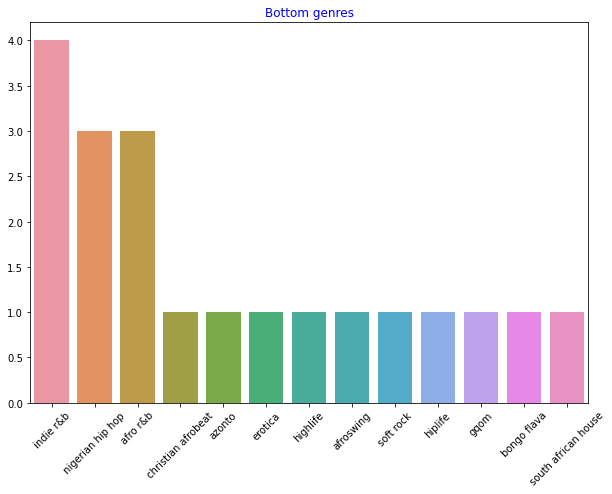

In [16]:
bottom = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=bottom[5::].index,y=bottom[5::].values)
plt.xticks(rotation=45)
plt.title('Bottom genres',color = 'blue')
print(f' The bottom genres are displayed')

### Concentrating on "afro dancehall", "afropop", and "nigerian pop" to know more about these genres. 
-Considering filtering the dataset to remove anything with a "0" popularity value (meaning the value was not classified with a popularity in the dataset. This would be considered noise in our exploratory analysis here.

 The top 3 genres are displayed


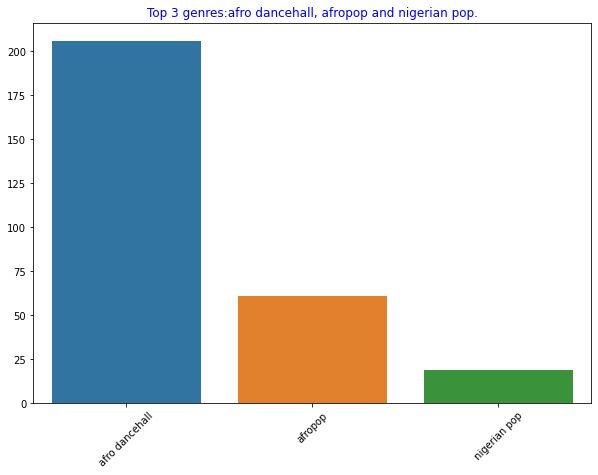

In [18]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top 3 genres:afro dancehall, afropop and nigerian pop.',color = 'blue')
print(f' The top 3 genres are displayed')

### Heatmap showing correlation.

 The correlation of Nigerian songs data set displayed


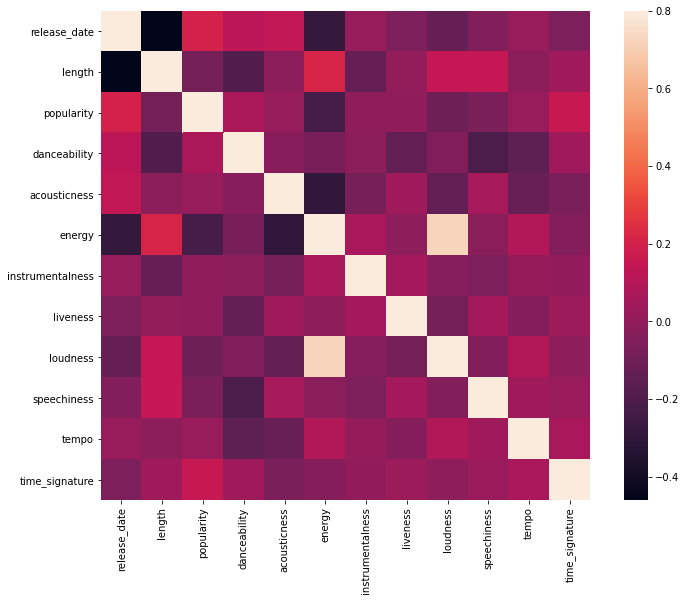

In [20]:
corr_songs = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_songs, vmax=.8, square=True)
print(f' The correlation of Nigerian songs data set displayed')

There is a very strong correlation between energy and loudness. Naturally, loud music is usually pretty energetic. 

### Examining our top three genres data distribution for popularity and danceability along a given x and y axis.

### Question: Is there any convergence in this dataset around a song's perceived popularity and danceability?

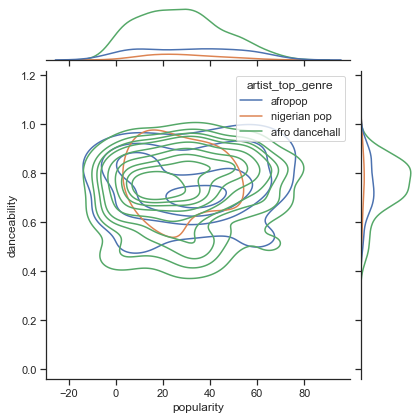

In [21]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

### FacetGrid

A FacetGrid shows that there are concentric circles that line up, regardless of genre.

Could it be that Nigerian tastes converge at a certain level of danceability for this genre?

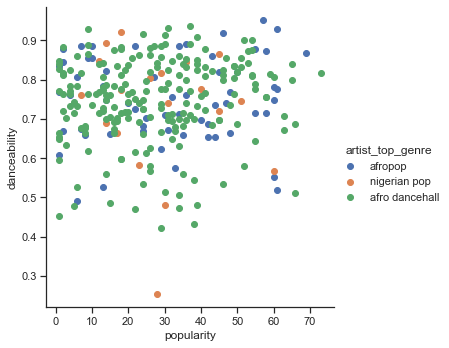

In [22]:
sns.FacetGrid(df, hue="artist_top_genre", height=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

<AxesSubplot:xlabel='release_date'>

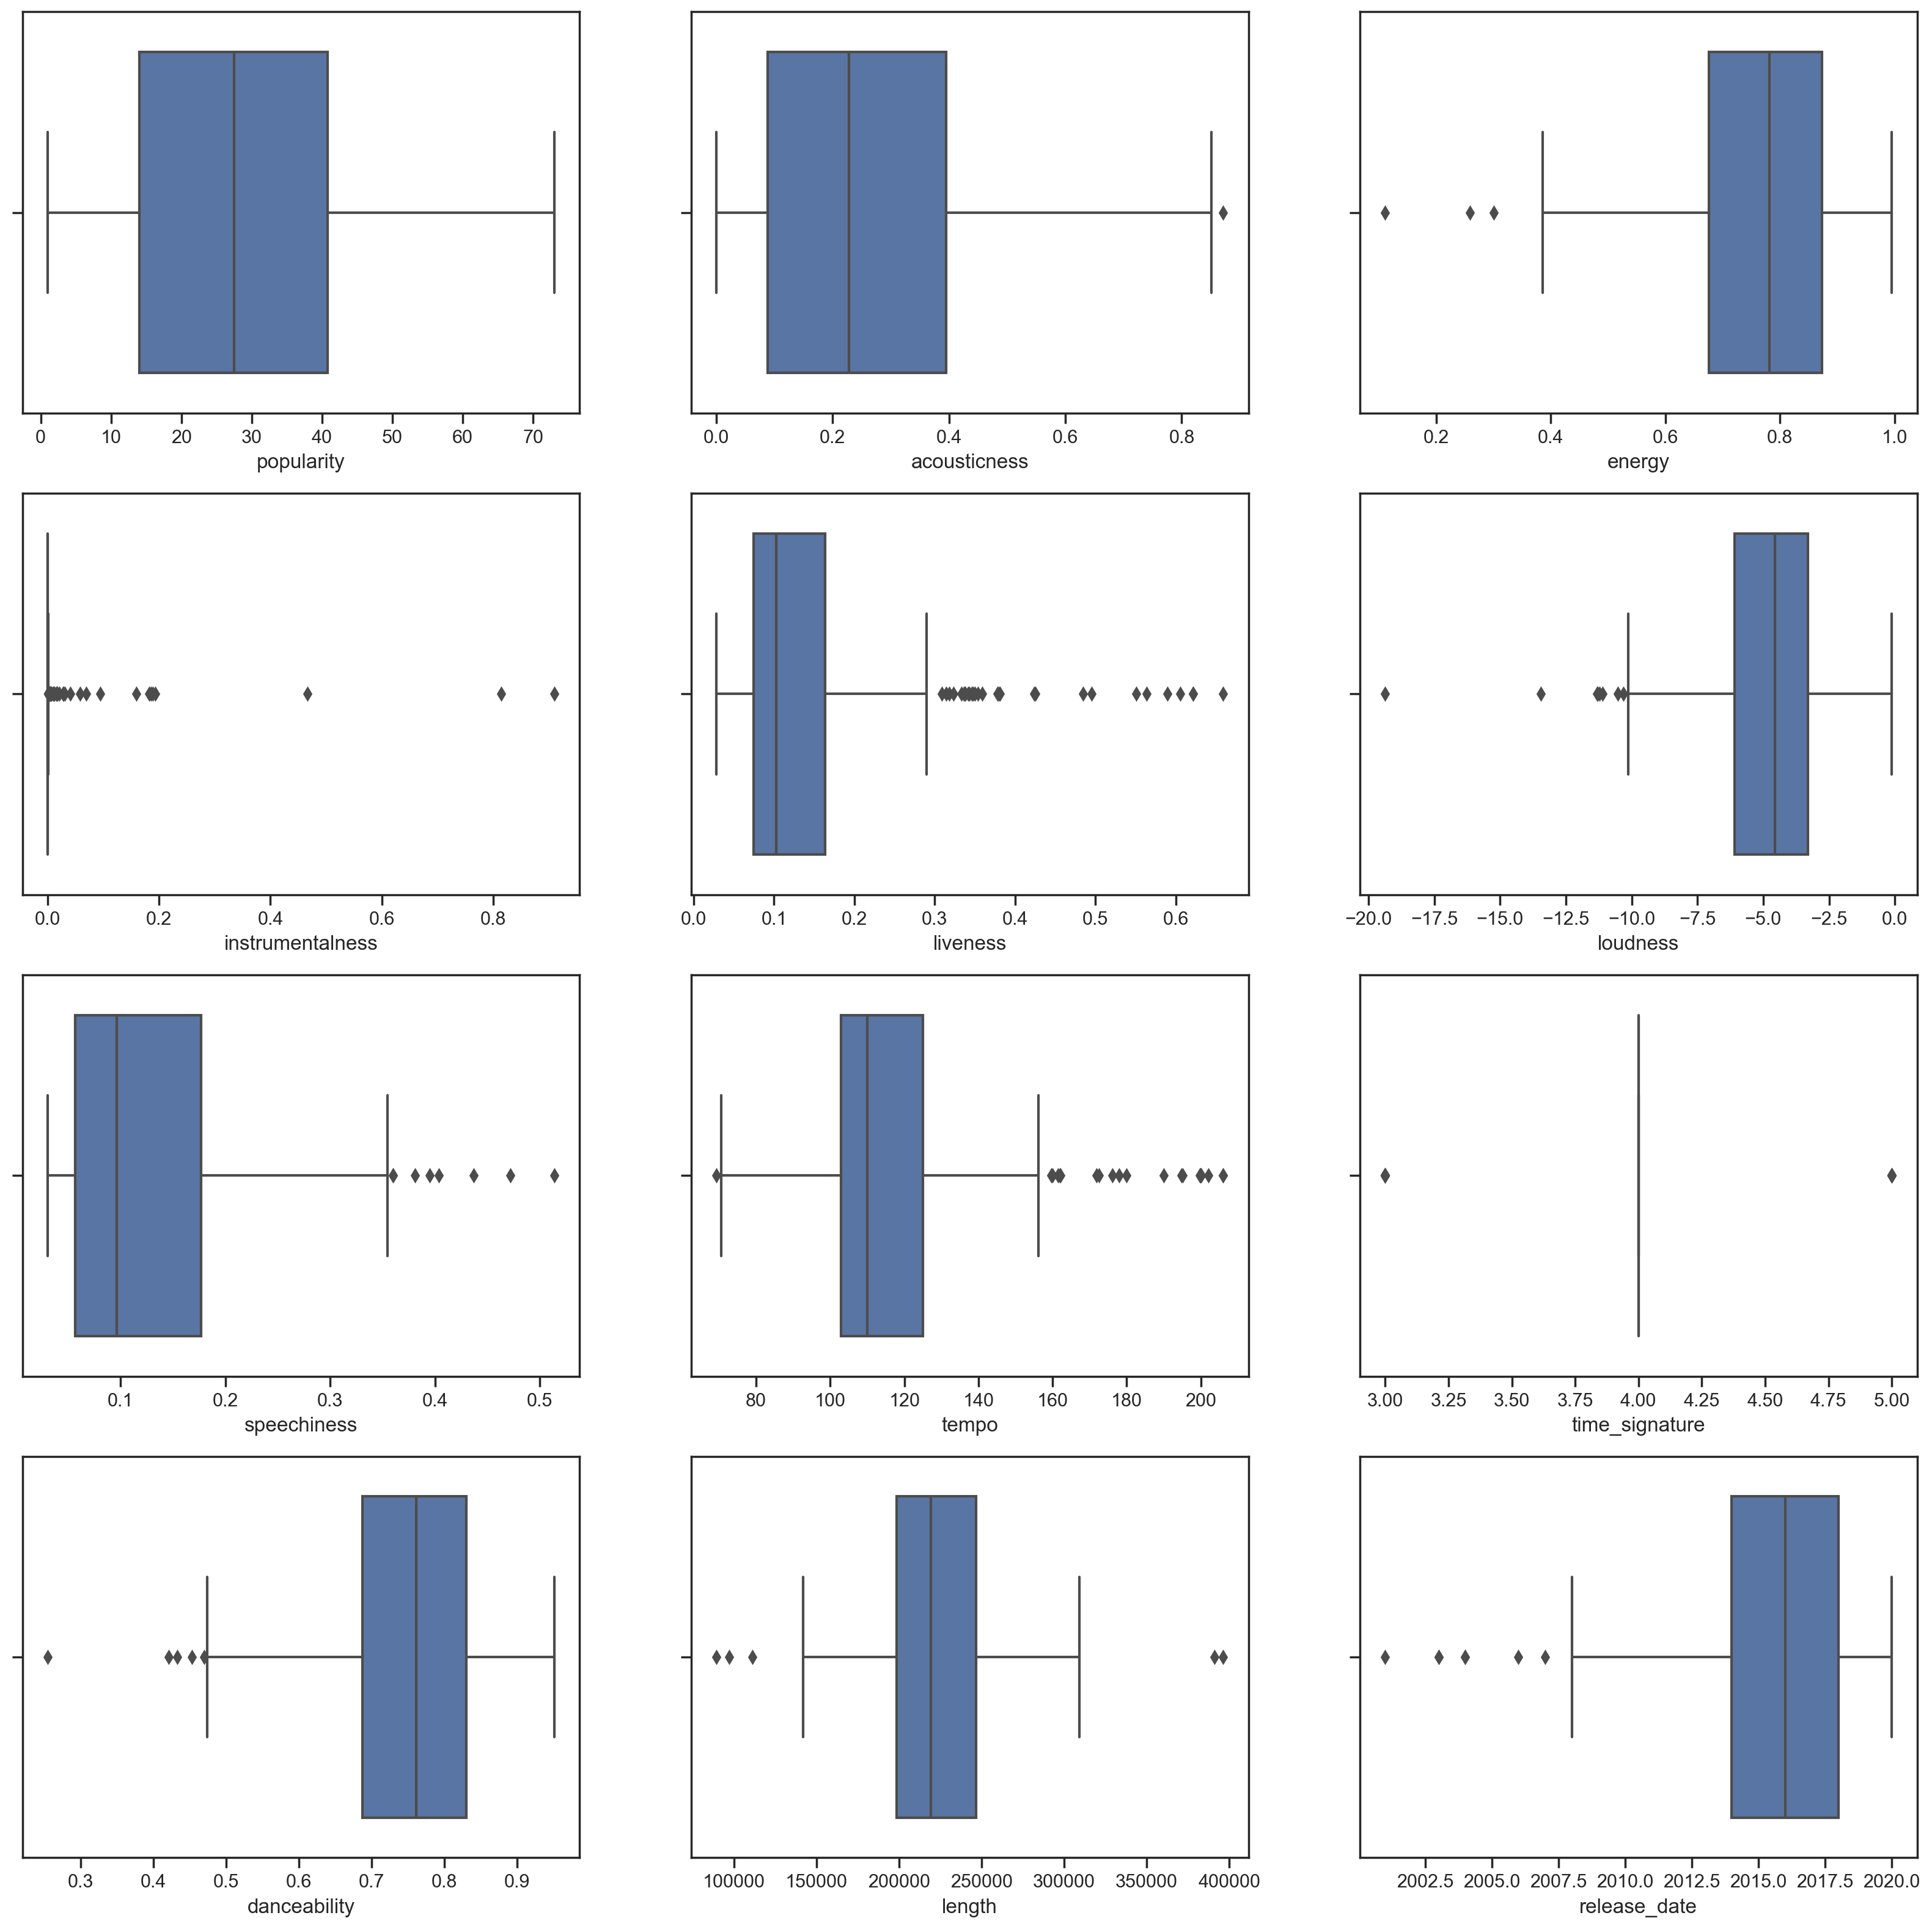

In [23]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

Shows the major release dates between 2013 to 2018. The lines in the boxes indicate the averages.

### Clustering process using K-Means

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)

#### The parameters used in the K-Means.

1. range: These are the iterations of the clustering process.

2. random_state: "Determines random number generation for centroid initialization".

3. WCSS: "within-cluster sums of squares" measures the squared average distance of all the points within a cluster to the cluster centroid.source.

4. Inertia: K-Means algorithms attempt to choose centroids to minimize 'inertia', "a measure of how internally coherent clusters are."source. The value is appended to the wcss variable on each iteration.

5. k-means++: In Scikit-learn you can use the 'k-means++' optimization, which "initializes the centroids to be (generally) distant from each other, leading to probably better results than random initialization.


#### Elbow method

Use the 'elbow method' to make sure the right number of clusters is selected.

In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Uyoyo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\Uyoyo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


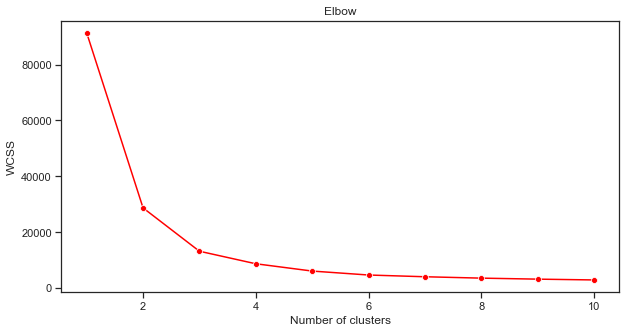

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters to use is 3. 

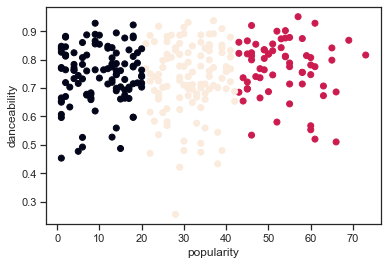

In [27]:

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

### Check the model's accuracy (K-Means)

In [28]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 111 out of 286 samples were correctly labeled.
Accuracy score: 0.39


In [30]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

### Silhouette clustering...evaluating clustering with data set

In [32]:
from sklearn import metrics        # Silhouette clustering...evaluating clustering with data set
score = metrics.silhouette_score(X, y_cluster_kmeans)   # is to check for accuracy of our K-means.....1 is correlation, 0 is no correlation, -1 is negative correlation
print(f' The Silhouette score is {score}.')     

 The Silhouette score is 0.5466747351275563.


Look for a silhouette score closer to 1. This score varies from -1 to 1, and if the score is 1, the cluster is dense and well-separated from other clusters. 

A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.source.

The Silhouette score is 0.547, so right in the middle. This indicates that our data is not particularly well-suited to this type of clustering, but let's continue.

## CONCLUSION:

In [ ]:
1. Amongst the 18 genres, the top 5 genres are:
    . afro dancehall 
    . afropop 
    . nigerian pop 
    . azontobeats 
    . alternative r&b
    
2. Bottom 5 genres were: 
    . christian afrobeat 
    . azonto 
    . soft rock 
    . hiplife 
    . highlife
    
3. Afro dancehall is three times more popular than Afro pop.

4. There is a very strong correlation between loudness and energy.

5. K-Means is not a good model for this data set. The Silhouette score indicated this.